# Introduction to EDA using Matplotlib and Seaborn

In [1]:
import numpy as np 
import pandas as pd

# The two libraries we are are using for EDA
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Using the movies.csv as the dataset for examples.

movies = pd.read_csv("movies_2_for_tutorial.csv")

In [3]:
movies.dtypes

MovieID           int64
Title            object
MPAA Rating      object
Budget          float64
Gross           float64
Release Date     object
Genre            object
Runtime         float64
Rating          float64
Rating Count    float64
Summary          object
dtype: object

In [4]:
movies.drop([615], axis=0, inplace=True)

In [5]:
movies.drop(columns=["Summary", "MovieID"], inplace=True)

In [6]:
movies["Budget"] = movies["Budget"].astype("int")
movies["Gross"] = movies["Gross"].astype("int")
movies["Release Date"] = pd.to_datetime(
    movies["Release Date"], format='%Y-%m-%d', errors='ignore')


In [7]:
movies.dtypes

Title                   object
MPAA Rating             object
Budget                   int64
Gross                    int64
Release Date    datetime64[ns]
Genre                   object
Runtime                float64
Rating                 float64
Rating Count           float64
dtype: object

## Bar chart / countplot

### Matplotlib

In [8]:
unique_genres_count = movies["Genre"].value_counts()

##### A simple bar plot in Matplotlib created with default figure settings. 

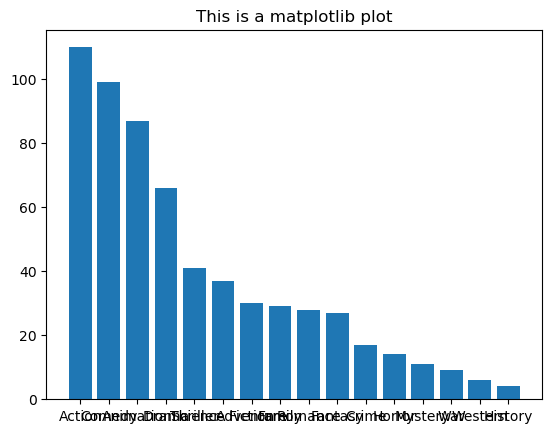

In [9]:
plt.bar(unique_genres_count.index,unique_genres_count)
plt.title('This is a matplotlib plot')
plt.show()

##### As you can see, it does not look very easy to read as the axes labels are missing or poorly oriented. Overall, settings can be changed for a better visualization and will do just that.

##### We will plot the same plot with adjusted figure settings.

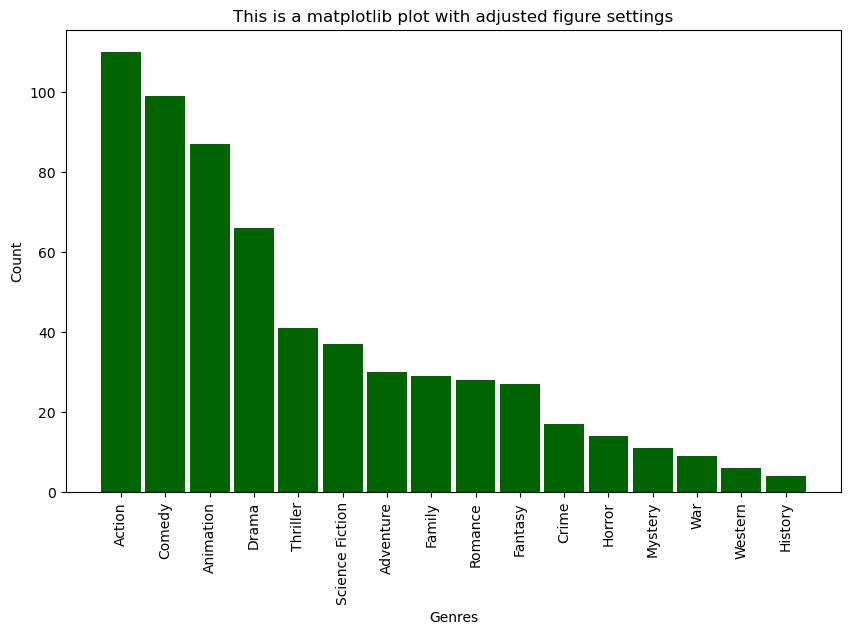

In [10]:
plt.figure(figsize=(10, 6)) # Size of the plot

plt.bar(unique_genres_count.index,unique_genres_count,width=0.9,color='darkgreen')

plt.title("This is a matplotlib plot with adjusted figure settings")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()

### Seaborn

##### A simple bar plot in Seaborn created with default figure settings. 

In [11]:
unique_genres_count

Action             110
Comedy              99
Animation           87
Drama               66
Thriller            41
Science Fiction     37
Adventure           30
Family              29
Romance             28
Fantasy             27
Crime               17
Horror              14
Mystery             11
War                  9
Western              6
History              4
Name: Genre, dtype: int64

<Axes: >

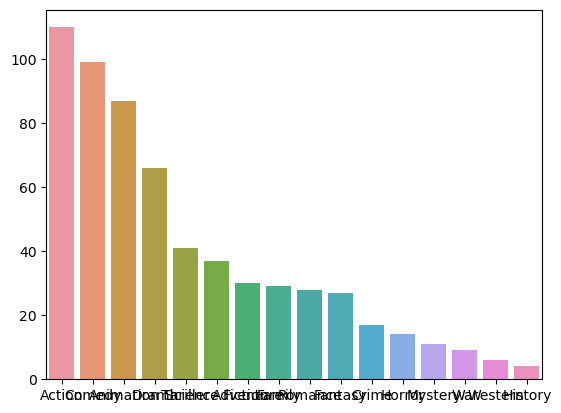

In [12]:
sns.barplot(x=unique_genres_count.index, y=unique_genres_count.values)

##### Now we will create the same plot with adjusted figure settings.

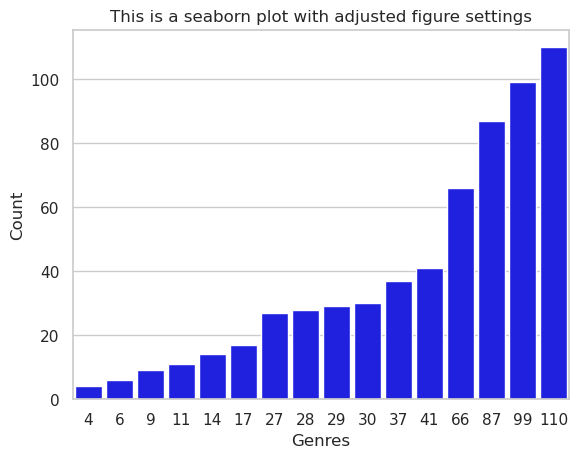

In [13]:
sns.set_theme(style='whitegrid') #set theme of all plots 
ax = sns.barplot(data=unique_genres_count, 
            x=unique_genres_count.index, 
            y=unique_genres_count.values,color='blue', width=0.9) # initiate axes object ax to adjust seaborn plot paramaters
ax.set_title('This is a seaborn plot with adjusted figure settings')
ax.set_xlabel('Genres')
ax.set_ylabel('Count')
plt.show()


#### To know more about the differences between Matplotlib and Seaborn, read: https://codesolid.com/matplotlib-vs-seaborn/ 
#### Check the gallery to see all the types of graphs possible with Seaborn

#### https://seaborn.pydata.org/examples/index.html

## Histogram

### Matplotlib

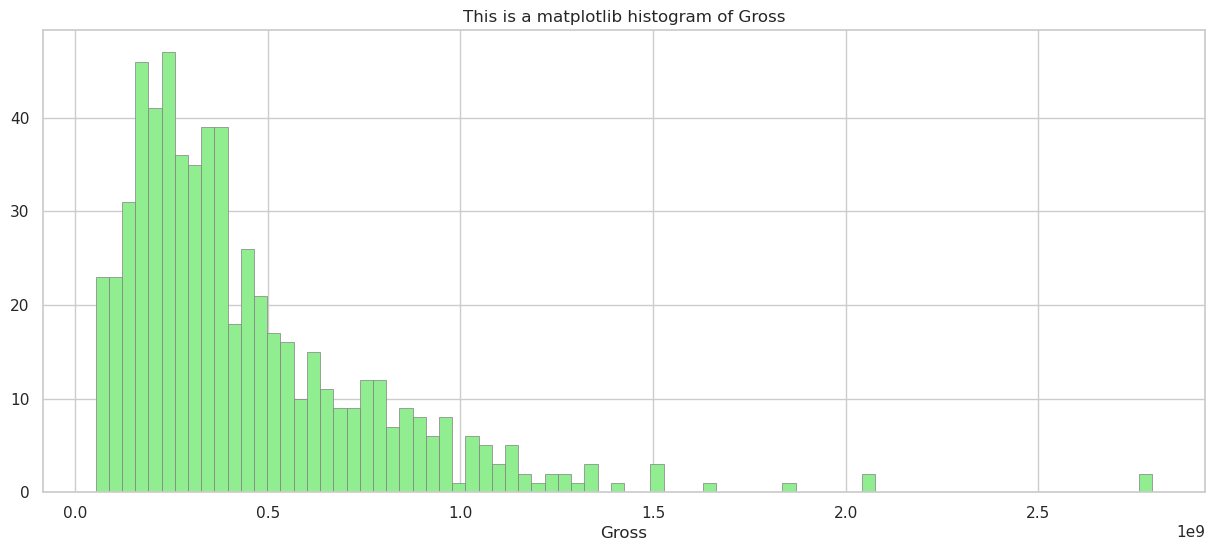

In [14]:
plt.figure(figsize=(15, 6)) # Size of the plot

plt.hist(movies['Gross'], color='lightgreen',bins=80, edgecolor='grey', linewidth=0.5)

plt.title("This is a matplotlib histogram of Gross")
plt.xlabel("Gross")

plt.show()

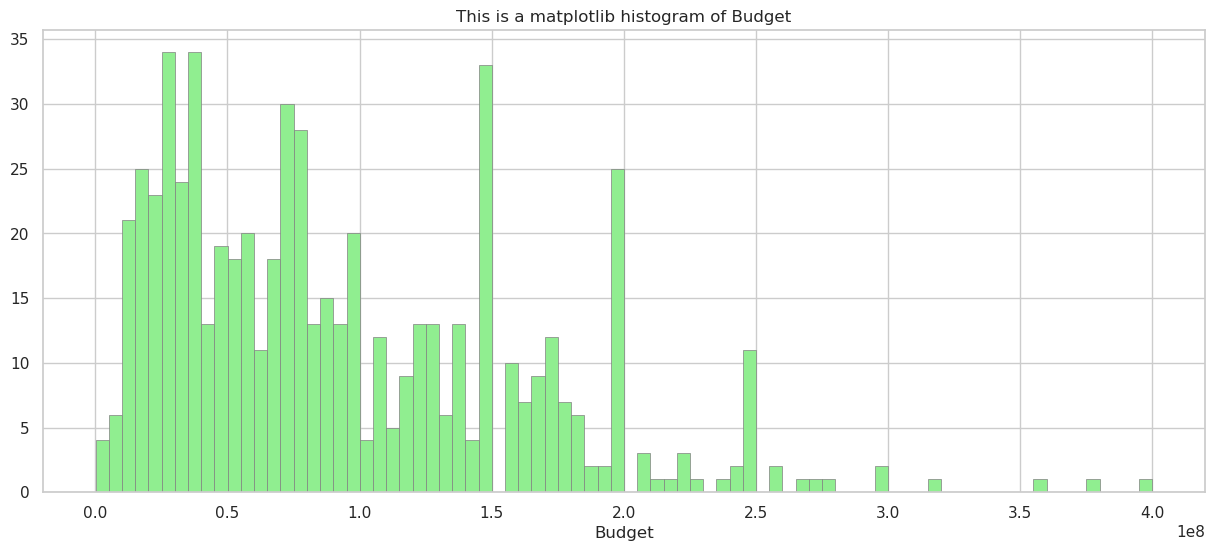

In [15]:
plt.figure(figsize=(15, 6)) # Size of the plot

plt.hist(movies['Budget'], color='lightgreen',bins=80, edgecolor='grey', linewidth=0.5)

plt.title("This is a matplotlib histogram of Budget")
plt.xlabel("Budget")

plt.show()

Notice how the 2 histogram have different y axis. if we want to have them side by side, we should have a common y axis

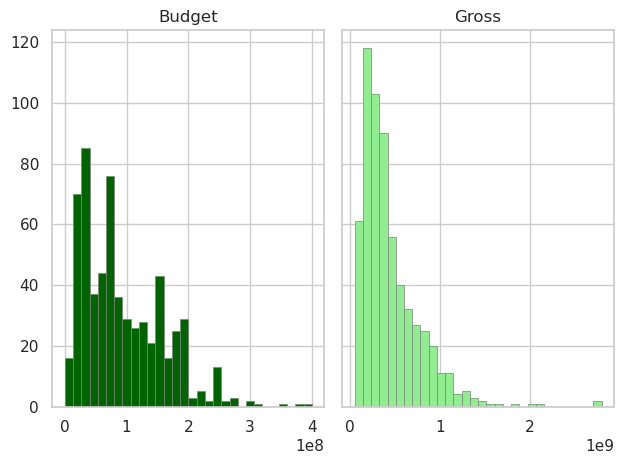

In [16]:
# We create two plots side by side to show the differences or similarities easily. 
# However, it is always best to show a similar Y-Axis when showing two plots side by side. 

# create axes objects where each object corresponds to a single plot
fig, axs = plt.subplots(1, 2, sharey="row", tight_layout=True) # sharey = "row" makes the y-axis the same.

# create plots for each axes object
axs[0].hist(movies['Budget'], color='darkgreen', bins=30,
         edgecolor='grey', linewidth=0.5)
axs[0].set_title("Budget")

axs[1].hist(movies['Gross'], color='lightgreen', bins=30,
         edgecolor='grey', linewidth=0.5)
axs[1].set_title("Gross")
        
plt.show()

### Seaborn

Text(0.5, 1.0, 'Gross')

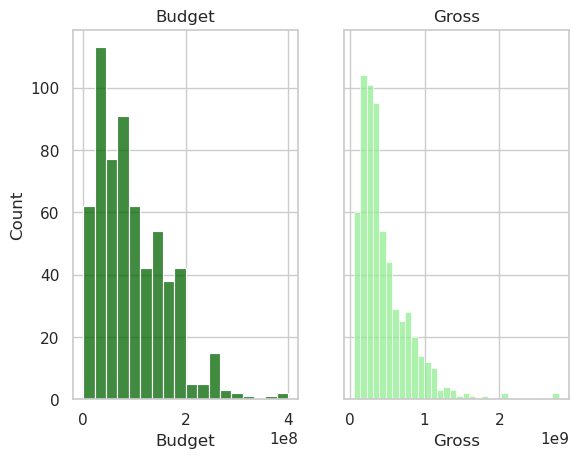

In [17]:
# creating subplots with seaborn
fig, axes=plt.subplots(1,2,sharey="row") 
sns.histplot(ax=axes[0], data=movies, x='Budget',color='darkgreen')
axes[0].set_title('Budget')
sns.histplot(ax=axes[1],data=movies, x='Gross',color='lightgreen')
axes[1].set_title('Gross')

## Boxplots

### Matplotlib

In [18]:
genre_budget

NameError: name 'genre_budget' is not defined

Text(0.5, 1.0, 'Relation between Genre and Budget using Matplotlib')

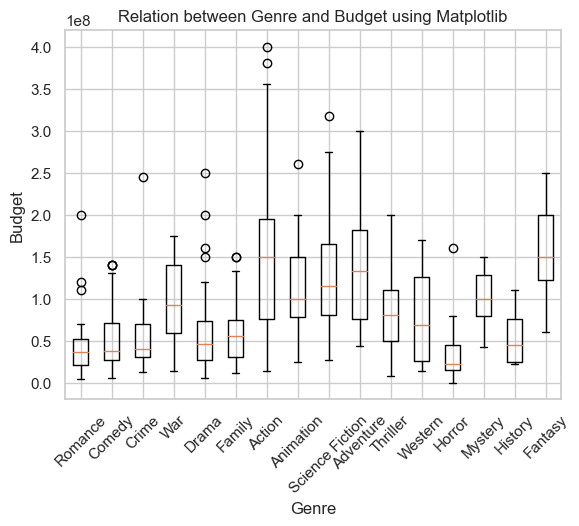

In [ ]:
# create a dictionary with keys as Genre names and values as the Budget.
genre_budget = {}
for i in movies['Genre'].unique():
    genre_budget[i] = movies[movies['Genre'] == i].Budget

# create boxplot 
plt.boxplot([x for x in genre_budget.values()],
            labels=[x for x in genre_budget.keys()])

# adjust plot settings
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.xticks(rotation=45)
plt.title('Relation between Genre and Budget using Matplotlib')


### Seaborn

Text(0.5, 1.0, 'Relation between Genre and Budget using Seaborn')

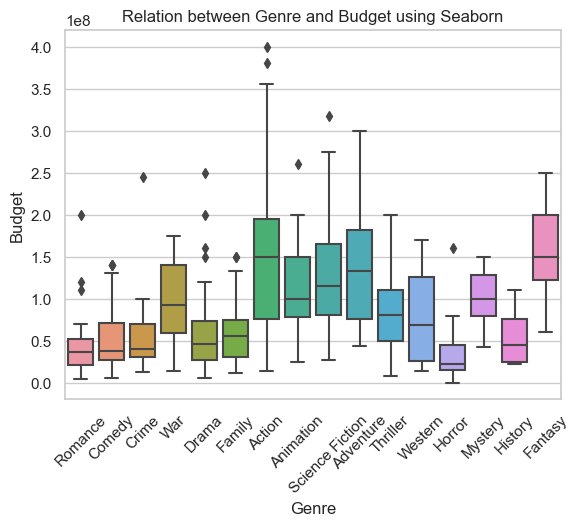

In [ ]:
ax = sns.boxplot(data = movies, y = "Budget", x = "Genre")

ax.tick_params(axis='x', labelrotation=45)

plt.title('Relation between Genre and Budget using Seaborn')



# Heatmap

### Seaborn

In [ ]:
movies_corr

,Budget,Gross,Runtime,Rating,Rating Count
Budget,1.000000,0.703747,0.299608,0.022324,0.298288
Gross,0.703747,1.000000,0.315040,0.231196,0.499849
Runtime,0.299608,0.315040,1.000000,0.369826,0.396101
Rating,0.022324,0.231196,0.369826,1.000000,0.667883
Rating Count,0.298288,0.499849,0.396101,0.667883,1.000000


/var/folders/k6/c240xsqn2fldrtvqhbv_lqj40000gn/T/ipykernel_72767/3737808501.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies_corr = movies.corr()


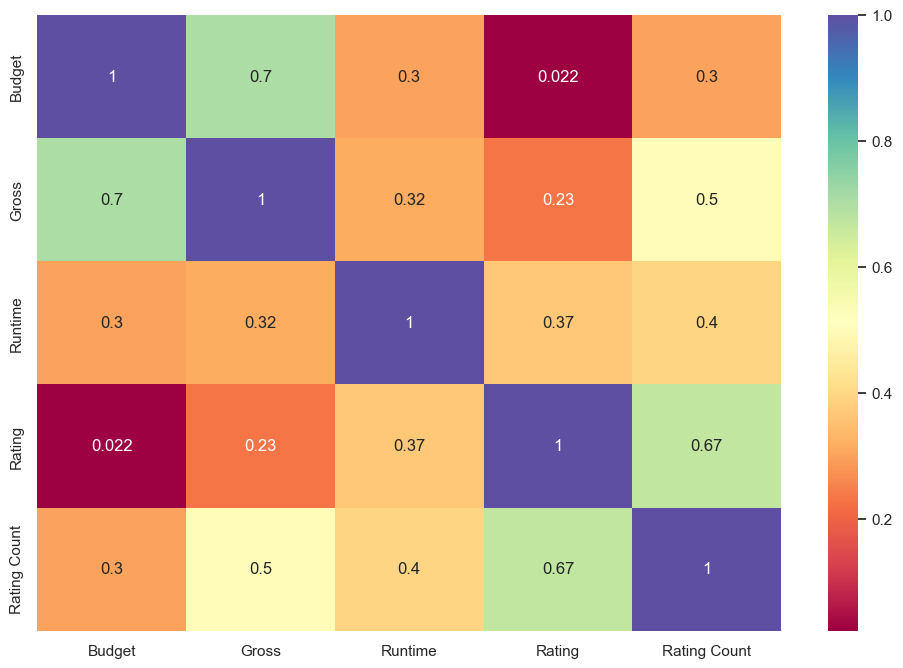

In [ ]:
# Basic heat map to show correlation between features. 

plt.figure(figsize=(12,8))

# Compute correlation between features them in a dataframe object called movies_corr
movies_corr = movies.corr()

# plot movies_corr as a heatmap
sns.heatmap(data=movies_corr, annot=True, cmap='Spectral')

plt.show()